In [1]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
from pathlib import Path
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from src.get_project_data import housing_data, locale_data
import plotly.express as px



In [2]:
#Define
housing_df = housing_data("Austin")

#The path to our CSV file for Austin housing data
housing_df = housing_df[["date", "zipcode", "zip_name", "average_listing_price"]]


# Display Texas housing data in a table
housing_df.head()


,date,zipcode,zip_name,average_listing_price
15,2023-03-01,78652,"manchaca, tx",784162
59,2023-03-01,78662,"red rock, tx",856983
83,2023-03-01,78759,"austin, tx",698303
89,2023-03-01,78747,"austin, tx",493692
97,2023-03-01,78659,"paige, tx",688996


In [3]:
#Define
locale_df = locale_data()
locale_df["LOCALE"] = locale_df["LOCALE"].map({11: 'Urban Large', 12: 'Urban Midsize', 13: 'Urban Small',
                                 21: 'Suburban Large', 22: 'Suburban Midrize', 23: 'Suburban Small',
                                 31: 'Town Fringe', 32: 'Town Dishant', 33: 'Town Remote',
                                 41: 'Rural Fringe', 42: 'Rural Distant', 43: 'Rural Remote'})



# Display Texas housing data in a table
locale_df.head()


,zipcode,LOCALE
26362,75001,Suburban Large
26363,75002,Suburban Large
26364,75006,Suburban Large
26365,75007,Suburban Large
26366,75009,Rural Fringe


In [4]:
# Merge the two dataframes using an inner join
df_full = housing_df.merge(locale_df, how='left', on="zipcode")
df_full = df_full [["date", "zipcode", "zip_name", "average_listing_price", "LOCALE"]]

#Make a new column for the year from the date column
df_full["year"] = pd.DatetimeIndex(df_full["date"]).year

#Replace date column with year column
df_full = df_full [["year", "zipcode", "zip_name", "average_listing_price", "LOCALE"]]

#Group by year 
df_fullgroup = df_full.groupby(["year", "zipcode"]).agg({"average_listing_price": "mean", "LOCALE": "first"})


# Display the data table
df_fullgroup



average_listing_price         LOCALE
year zipcode                                      
2016 76511            135496.833333  Rural Distant
     76527            577072.166667  Rural Distant
     76530                 265021.0  Rural Distant
     76537            229168.666667  Rural Distant
     76574            281678.166667   Rural Fringe
...                             ...            ...
2023 78757            892620.666667    Urban Large
     78758            471727.666667    Urban Large
     78759            707763.666667    Urban Large
     78953            498333.333333  Rural Distant
     78957            514564.333333  Rural Distant

[737 rows x 2 columns]

In [5]:
# Create a new dataframe for the average listing price by year
df_fullgroup = df_fullgroup.reset_index()
df_fullgroup = df_fullgroup[["year", "average_listing_price"]]
df_fullgroup = df_fullgroup.groupby(["year"]).agg({"average_listing_price": "mean"})
df_fullgroup = df_fullgroup.reset_index()

# Display the data table
df_fullgroup


,year,average_listing_price
0,2016,522215.078755
1,2017,521456.947757
2,2018,534342.730653
3,2019,573144.284236
4,2020,611179.433947
5,2021,767373.537975
6,2022,912159.162088
7,2023,891685.288889


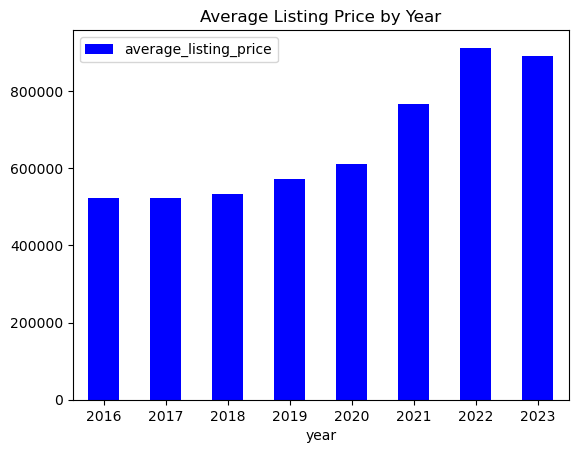

In [6]:
#create a bar graph for the average listing price by year
df_fullgroup.plot.bar(x="year", y="average_listing_price", rot=0, title="Average Listing Price by Year", color="blue")
plt.show()

In [7]:
#create dataframe for the average listing price per locale
df_fullgroup_locale = df_full.groupby(["year", "LOCALE"]).agg({"average_listing_price": "mean"})
df_fullgroup_locale = df_fullgroup_locale.reset_index()
df_fullgroup_locale = df_fullgroup_locale[["year", "LOCALE", "average_listing_price"]]
df_fullgroup_locale = df_fullgroup_locale.groupby(["year", "LOCALE"]).agg({"average_listing_price": "mean"})
df_fullgroup_locale = df_fullgroup_locale.reset_index()

# Display the data table
df_fullgroup_locale

,year,LOCALE,average_listing_price
0,2016,Rural Distant,471158.219355
1,2016,Rural Fringe,431312.567416
2,2016,Suburban Large,1083534.190476
3,2016,Urban Large,541896.057692
4,2016,Urban Midsize,350510.5
5,2017,Rural Distant,490354.039867
6,2017,Rural Fringe,439416.713889
7,2017,Suburban Large,985623.666667
8,2017,Urban Large,562939.035256
9,2017,Urban Midsize,343774.083333


Show Average Listing Price by Year in the Austin Area in a Line Graph

In [8]:
#Create a line chart for the average listing price by year
fig = px.line(df_fullgroup, x="year", y="average_listing_price", title="Average Listing Price by Year in the Austin Area")
fig.show()


In [9]:
#Create a Geo Spatial Graph to show the average listing price by zipcode
fig = px.choropleth(df_full, locations="zipcode",
                    color="average_listing_price", # lifeExp is a column of gapminder
                    hover_name="zip_name", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()


    


In [10]:
#Create a scatter plot to show the average listing price by zipcode
fig = px.scatter(df_full, x="average_listing_price", y="zipcode", color="LOCALE", title="Average Listing Price by Zipcode in the Austin Area")
fig.show()



